### Program for Histogram Equalization


In [127]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#### histogram calculation and equalization

In [130]:
def histogram_eq(im):
    im=im.convert('L')
    freq=[0]*256
    w, h=im.size
    for x in range(w):
        for y in range(h):
            freq[im.getpixel((x, y))]+=1

    cum_freq=freq
    for i in range(1, 256):
        cum_freq[i]+=cum_freq[i-1]
        
    cdf=np.array(cum_freq)/(w*h)
    s=np.round(cdf*255)

    new_freq=[0]*256

    for i in range(256):
        new_freq[int(s[i])]+=freq[i]

    res=Image.new('L', size=im.size)
    for x in range(w):
        for y in range(h):
            res.putpixel((x, y), int(s[im.getpixel((x, y))]))
    return res, new_freq

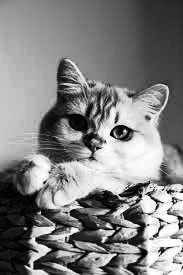

In [131]:
im = Image.open("cat.jpeg")

# Perform histogram equalization
equalized_im, hist = histogram_eq(im)
equalized_im

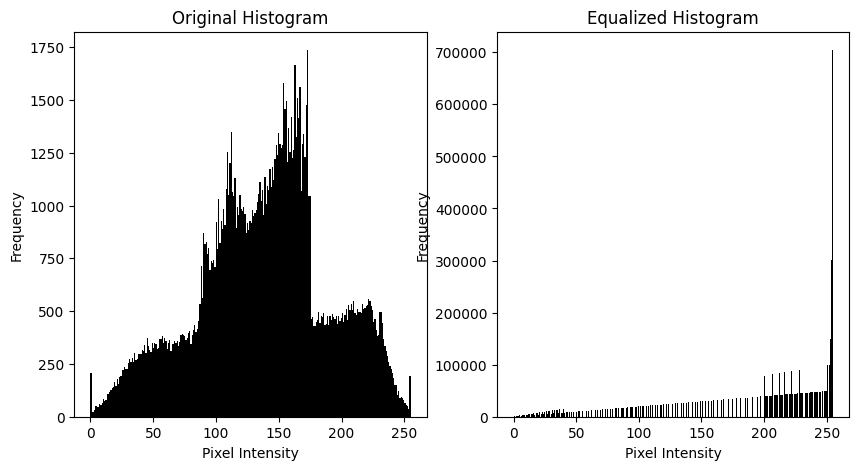

In [132]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(np.array(im).ravel(), bins=256, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(range(256), hist, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### perfrom histogram equalization more than one time and compare results

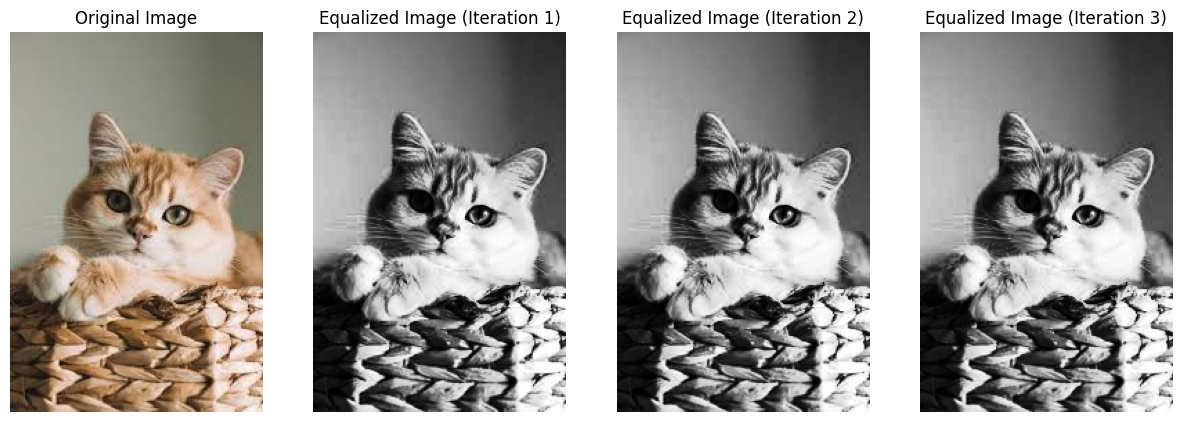

In [149]:
image = Image.open('cat.jpeg')

# Perform histogram equalization for 3 iterations
equalized_image = image
for _ in range(3):
    equalized_image,x = histogram_eq(equalized_image)

# Display original and equalized images
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i in range(3):
    plt.subplot(1, 4, i + 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f'Equalized Image (Iteration {i+1})')
    plt.axis('off')
    equalized_image,x = histogram_eq(equalized_image)
plt.show()

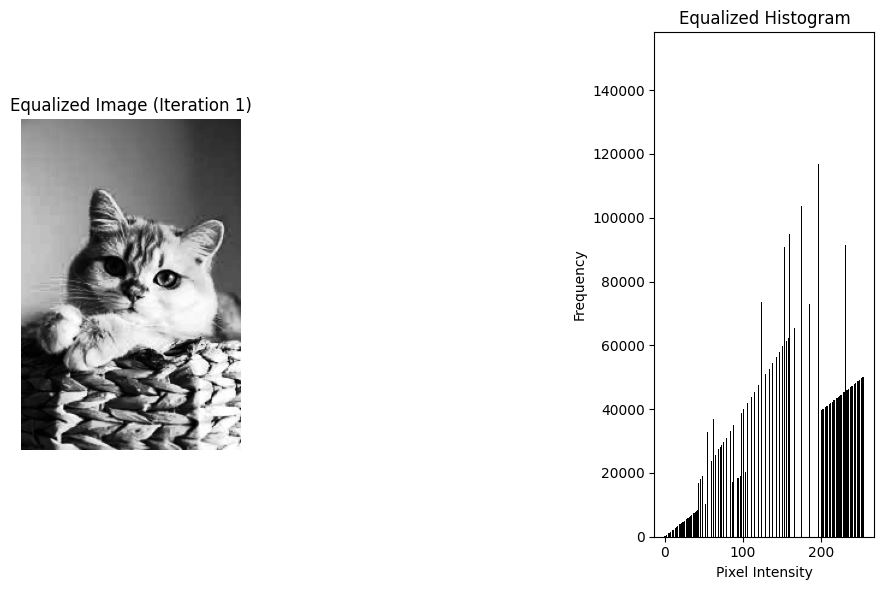

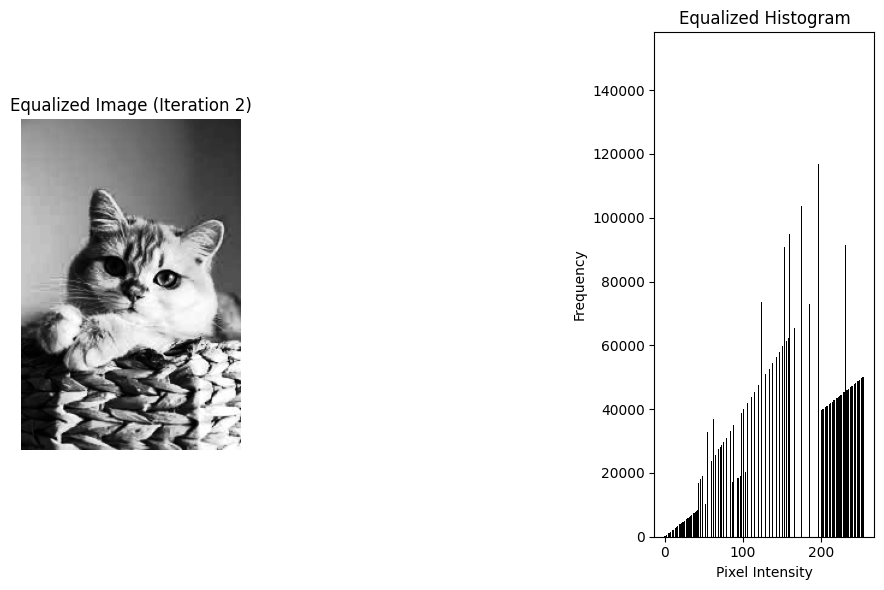

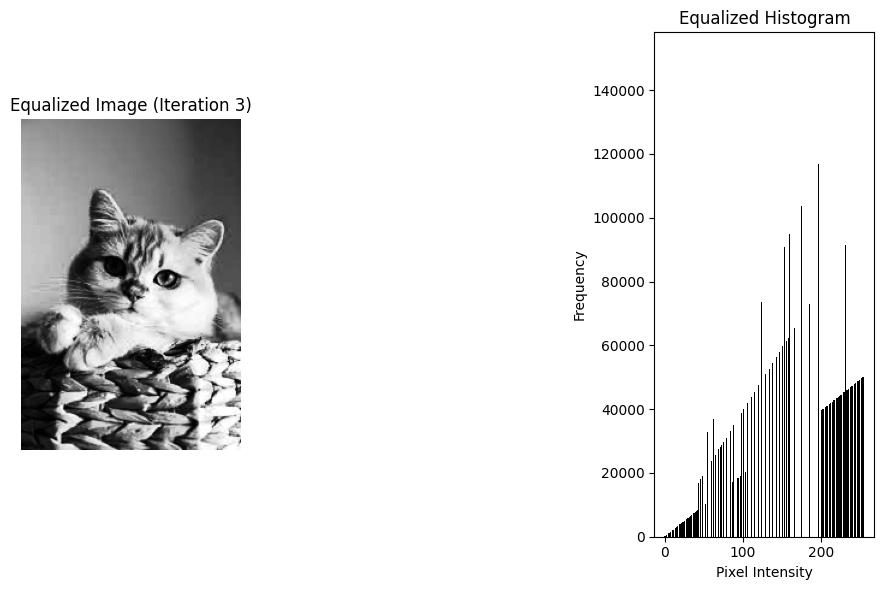

In [153]:
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f'Equalized Image (Iteration {i+1})')
    plt.axis('off')
    
    equalized_image, hist = histogram_eq(equalized_image)
    
   
    
    plt.subplot(1, 4, 3)
    plt.bar(range(256), hist, color='black')
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    
    plt.tight_layout()
    plt.show()

### Adaptive histogram

In [143]:
from PIL import Image

def adaptive_histogram_eq(im, out):
    im = im.convert('L')
    w, h = im.size
    res = Image.new('L', (w, h))
    N = 128

    for x in range(0, w, N):
        for y in range(0, h, N):
            block = Image.new('L', (N, N))
            for i in range(min(N, w - x)): 
                for j in range(min(N, h - y)):
                    pixel_value = im.getpixel((x + i, y + j))
                    block.putpixel((i, j), pixel_value)
            
            block,zz = histogram_eq(block)
            
            for i in range(min(N, w - x)):
                for j in range(min(N, h - y)):  # Ensure j is within the bounds of the image
                    res.putpixel((x + i, y + j), block.getpixel((i, j)))

    res.save(out)
    return res


In [144]:
image= Image.open('dog.jpeg')
image.convert('1').save('img2.jpeg')

In [145]:
img2=Image.open('img2.jpeg')

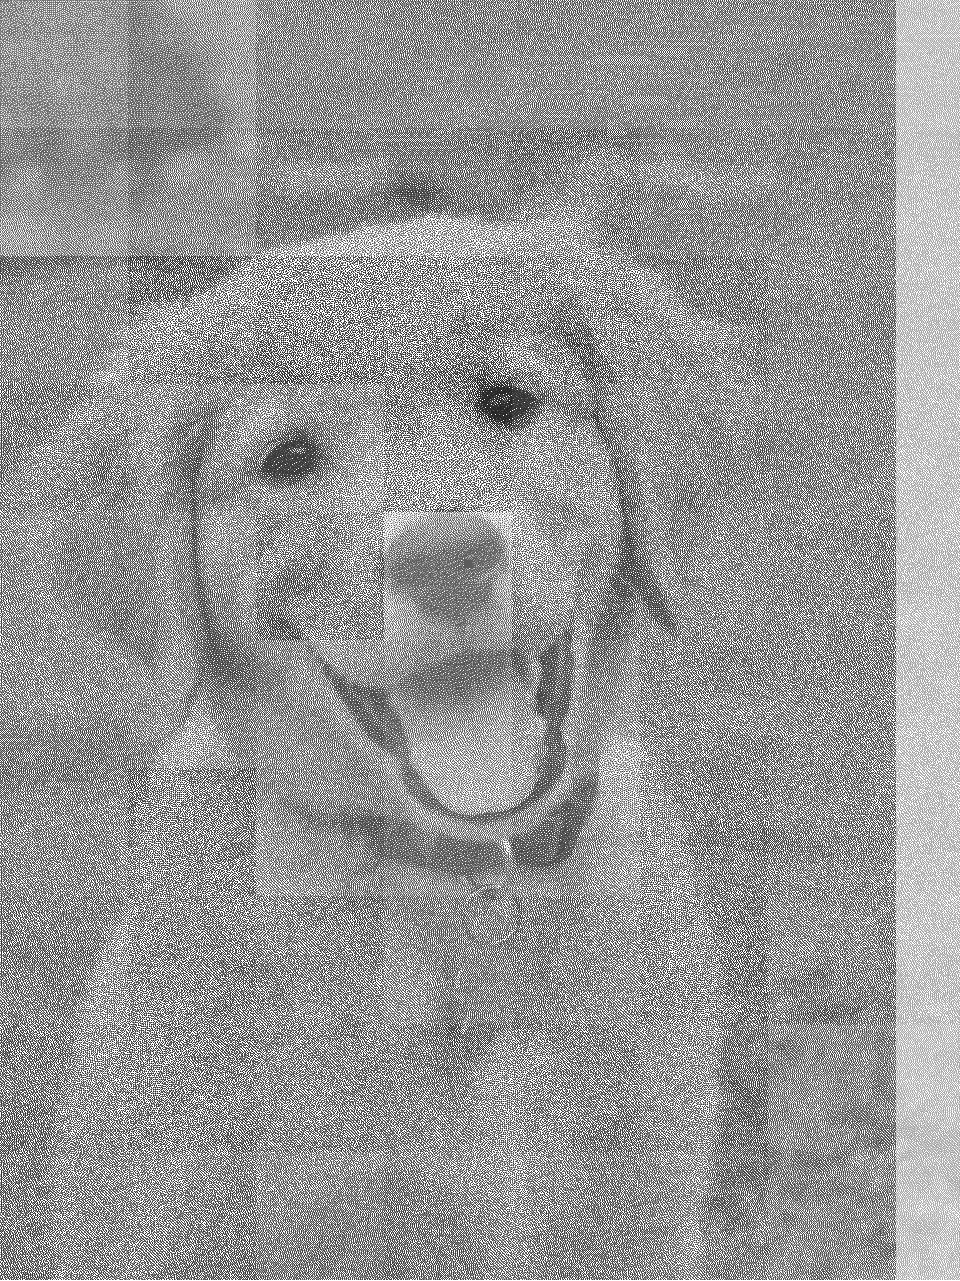

In [146]:
adaptive_histogram_eq(img2, "adaptive_histogram_eq.jpeg")

### Execute the local statistics histogram equalization

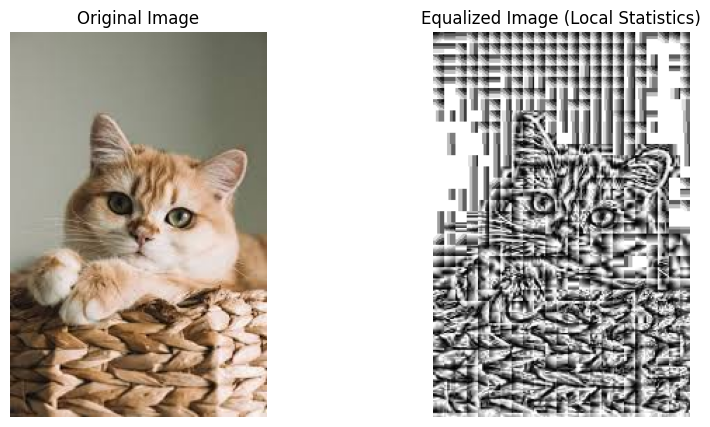

In [147]:
def calculate_local_histogram(im, x, y, block_size):
    w, h = im.size
    block = im.crop((x, y, x + block_size[0], y + block_size[1]))
    hist = block.histogram()
    return hist

def local_statistics_histogram_eq(im, block_size=(8, 8)):
    im = im.convert('L')
    w, h = im.size
    res = Image.new('L', (w, h))

    for x in range(0, w, block_size[0]):
        for y in range(0, h, block_size[1]):
            hist = calculate_local_histogram(im, x, y, block_size)
            cdf = np.cumsum(hist) / sum(hist) * 255
            for i in range(x, min(x + block_size[0], w)):
                for j in range(y, min(y + block_size[1], h)):
                    res.putpixel((i, j), int(cdf[im.getpixel((i, j))]))

    return res

image = Image.open('cat.jpeg')

equalized_image = local_statistics_histogram_eq(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image (Local Statistics)')
plt.axis('off')

plt.show()
